In [3]:
from qiskit import QuantumCircuit, Aer, execute, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

In [4]:
secret_number = bin(10)[2:]
reversed_secret_number = reversed(secret_number)
secret_number_length = len(secret_number)
secret_number_range = range(secret_number_length)

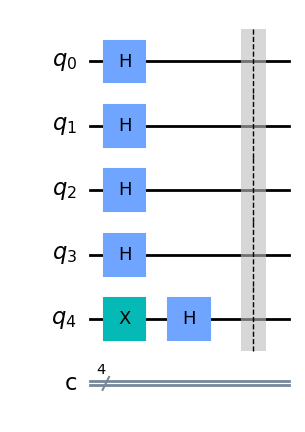

In [5]:
circuit = QuantumCircuit(secret_number_length + 1, secret_number_length)
circuit.h(secret_number_range)
circuit.x(secret_number_length)
circuit.h(secret_number_length)
circuit.barrier()
circuit.draw('mpl')

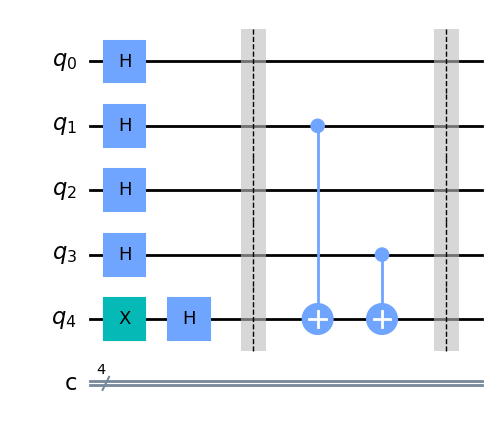

In [6]:
for pos, char in enumerate(reversed_secret_number):
    if char == '1':
        circuit.cx(pos, secret_number_length)
circuit.barrier()
circuit.draw('mpl')

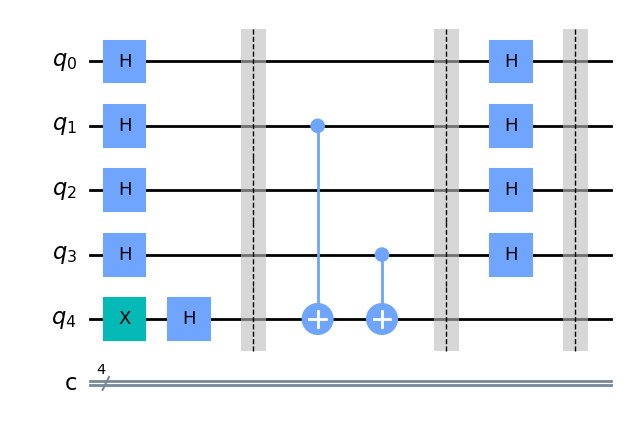

In [7]:
circuit.h(secret_number_range)
circuit.barrier()
circuit.draw('mpl')

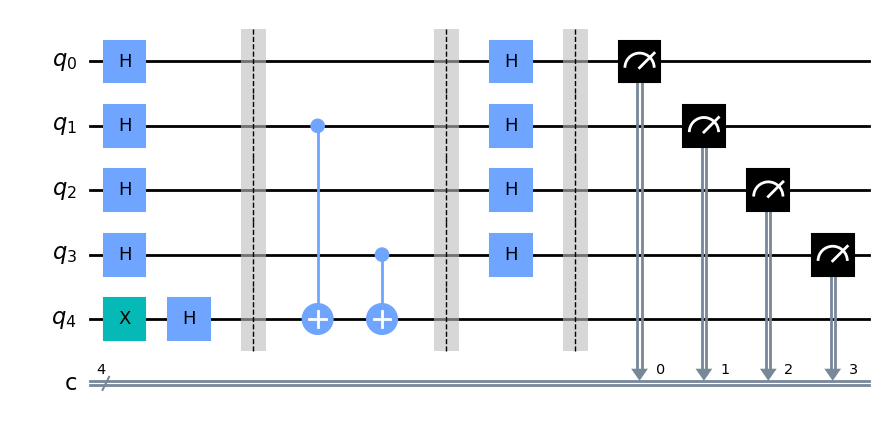

In [8]:
circuit.measure(secret_number_range, secret_number_range)
circuit.draw('mpl')

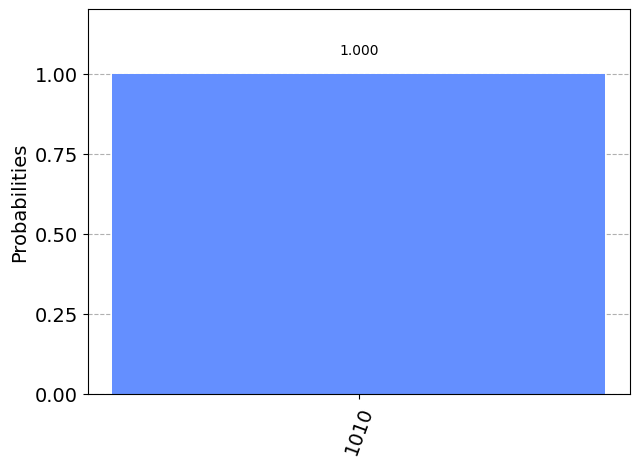

In [9]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [10]:
print(int(list(counts.keys())[0], 2))

10


In [11]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
devices = provider.backends(n_qubits=5, operational=True, simulator=False)
device = least_busy(devices)

In [12]:
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())
job_monitor(job)

6303ed79a7ff83b9e3782bf8
Job Status: job has successfully run


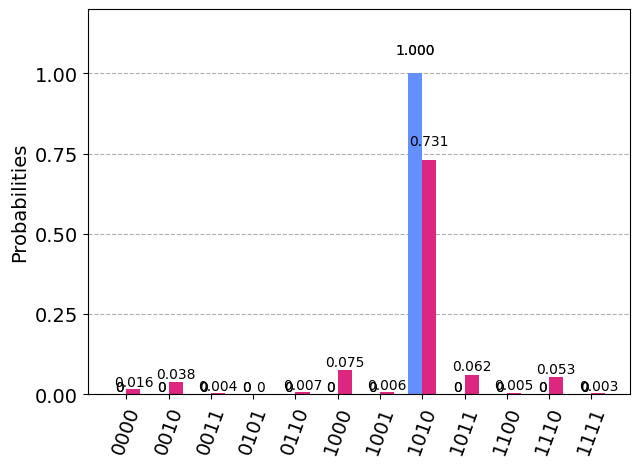

In [13]:
device_result = job.result()
device_counts = device_result.get_counts()
plot_histogram([counts, device_counts])